In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
sxb = pd.read_csv('sxb.csv', sep=';')

# Delete 'NaN' Rows
NullRows = sxb[sxb.isna().any(axis=1)]
sxb = sxb.dropna(how='all')


In [80]:
pd.set_option("max_rows", None)
sxb['MOIS'] = sxb['NOTIFICATION_DATE'].str[5:7].astype(int)
sxb['MONTANT'] = pd.to_numeric(sxb['MONTANT'],errors='coerce')

In [81]:
seuil = 400000.0
sxb['TITULAIRES_DENOMINATION'] = sxb['TITULAIRES_DENOMINATION'].str.lower()

# Regroupement par prestataire de services
depenses_par_prestataire = sxb.groupby('TITULAIRES_DENOMINATION').sum()
top_depenses_par_prestataire = depenses_par_prestataire[depenses_par_prestataire['MONTANT'] > seuil]
top_depenses_par_prestataire = top_depenses_par_prestataire.reset_index()
prestataires = top_depenses_par_prestataire['TITULAIRES_DENOMINATION']
montant = top_depenses_par_prestataire['MONTANT']

total2019 = sxb['MONTANT'].sum()


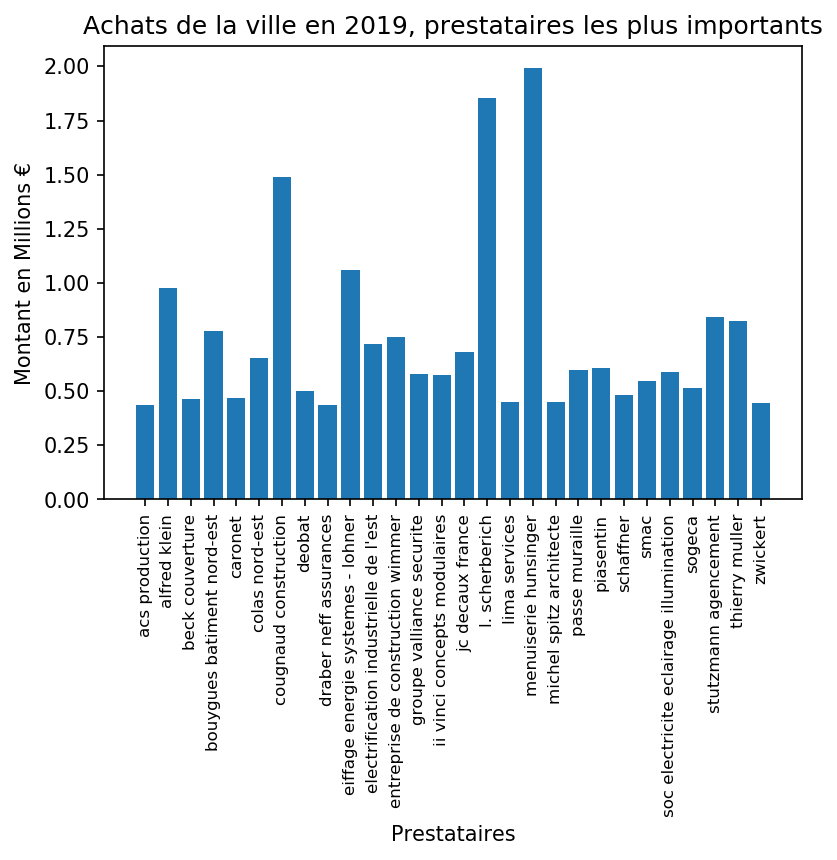

In [82]:
plt.figure(dpi=150)
plt.bar(prestataires, montant / 10**6)
plt.xticks(prestataires, rotation='90', fontsize=8)
plt.xlabel('Prestataires')
plt.ylabel('Montant en Millions €')
plt.title('Achats de la ville en 2019, prestataires les plus importants')
plt.show()

In [113]:
depenses_par_mois = sxb.groupby('MOIS').sum()
depenses_par_mois['MONTANT RELATIF'] = depenses_par_mois['MONTANT'] * 100 / total2019
depenses_par_mois = depenses_par_mois.reset_index()
pourcentages = depenses_par_mois['MONTANT RELATIF']
Mois =  ['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']

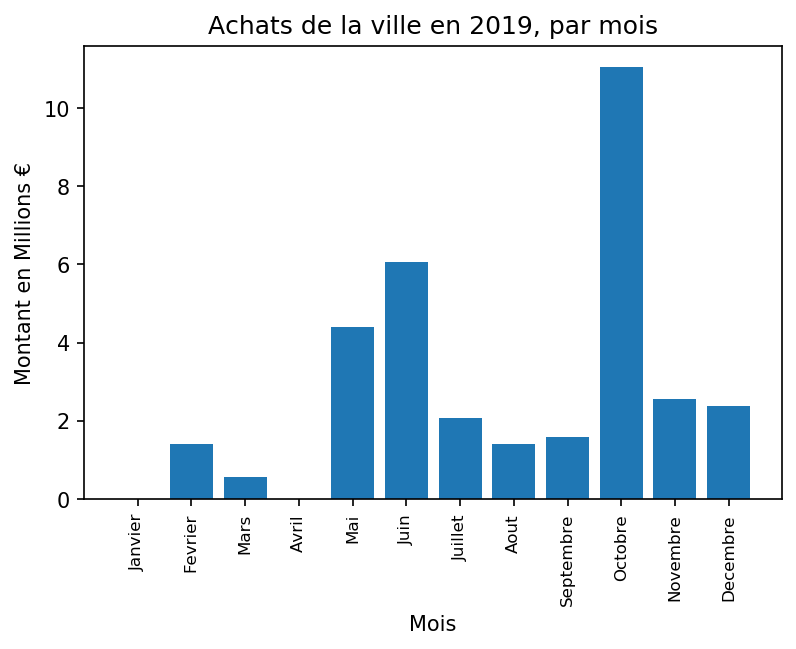

In [114]:
plt.figure(dpi=150)
plt.bar(Mois, depenses_par_mois['MONTANT'] / 10**6)
plt.xticks(Mois, rotation='vertical', fontsize=8)
plt.title('Achats de la ville en 2019, par mois')
plt.xlabel('Mois')
plt.ylabel('Montant en Millions €')
plt.show()

# Hypothese: 
### Les depenses sont plus importantes au mois d'Octobre a cause des festivites qui approchent

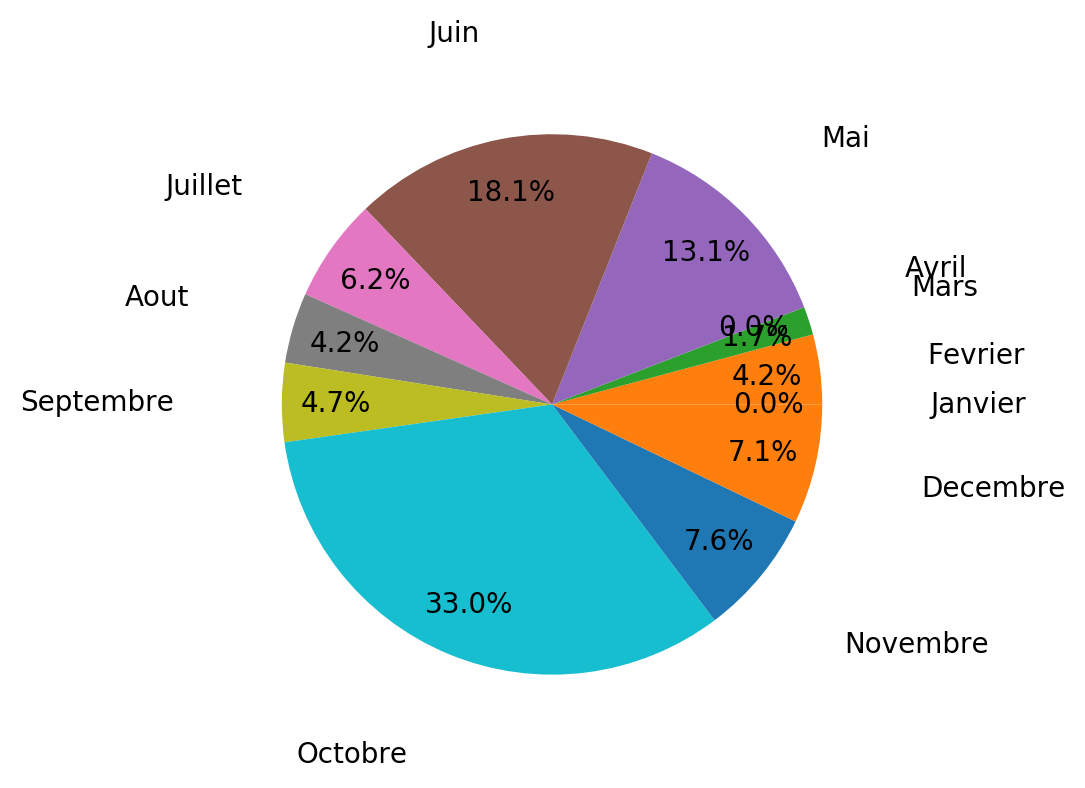

In [117]:
plt.figure(dpi=200)
plt.pie(pourcentages, labels=Mois, autopct='%1.1f%%', startangle=0, labeldistance=1.4, pctdistance=0.8)
plt.axis('equal')
plt.show()

In [67]:
sxb['MARCHE_OBJET'] = sxb['MARCHE_OBJET'].str.lower()
depenses_par_projet = sxb.groupby('MARCHE_OBJET').sum()
top_depenses_par_projet = depenses_par_projet[depenses_par_projet['MONTANT'] > seuil]
top_depenses_par_projet = top_depenses_par_projet.reset_index()

In [68]:
top_projets = top_depenses_par_projet['MARCHE_OBJET']

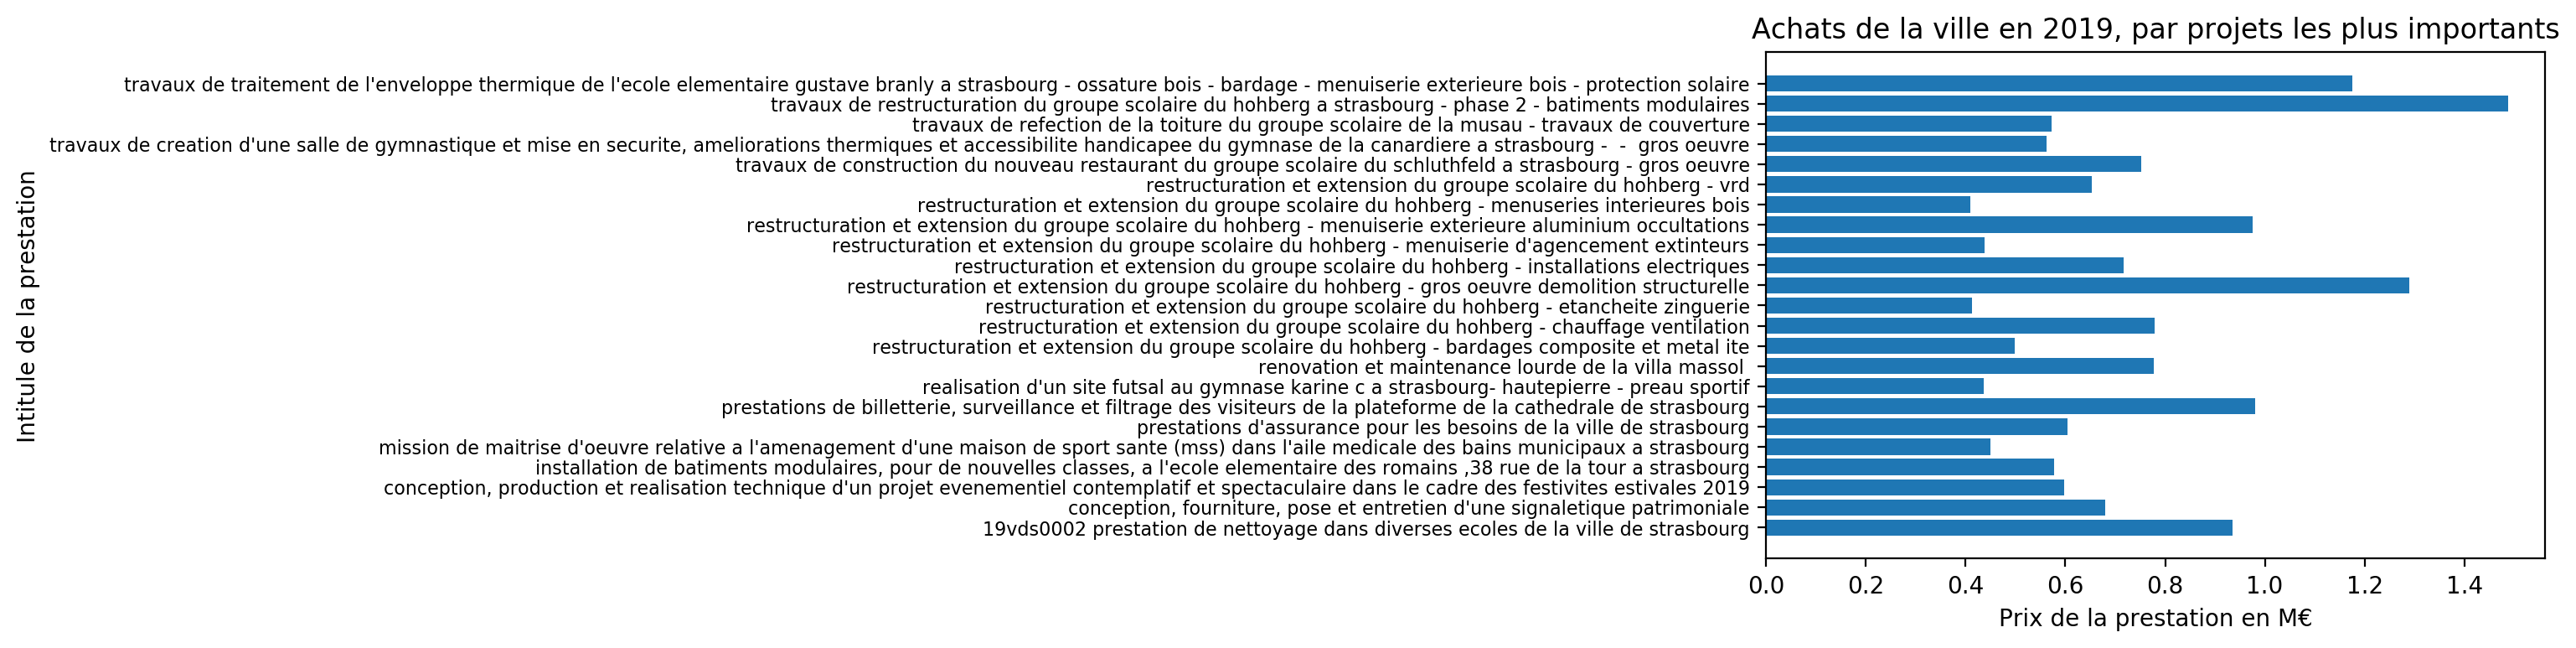

In [69]:
plt.figure(dpi=200)
plt.barh(top_projets, top_depenses_par_projet['MONTANT'] / 10**6)
plt.title('Achats de la ville en 2019, par projets les plus importants')
plt.yticks(top_projets, fontsize=8)
plt.ylabel('Intitule de la prestation')
plt.xlabel('Prix de la prestation en M€')
plt.show()

In [70]:
depenses_par_projet = depenses_par_projet.reset_index()

In [71]:
depenses_par_projet['MONTANT RELATIF'] = depenses_par_projet['MONTANT'] * 100 / total2019

In [72]:
depenses_par_projet.drop('MOIS',axis=1)

,MARCHE_OBJET,MONTANT,MONTANT RELATIF
0,fourniture et pose de mobiliers urbains quais...,100304.50,0.299798
1,mise en place et animation d'une plateforme d...,177830.00,0.531513
2,prestations de transferts par voiture des par...,0.00,0.000000
3,prestations de transferts par voiture des par...,0.00,0.000000
4,prestations de transferts par voiture des par...,0.00,0.000000
5,19vds0002 prestation de nettoyage dans diverse...,935082.00,2.794850
6,acquisition d'instruments de musique d'etudes ...,0.00,0.000000
7,acquisition d'instruments de musique d'etudes ...,0.00,0.000000
8,acquisition de chaises y compris accessoires a...,0.00,0.000000
9,acquisition et livraison de moquettes pour div...,0.00,0.000000


In [59]:
total_pcr = depenses_par_projet['MONTANT RELATIF'].sum()